In [18]:
#Cropping image
import cv2
#img = cv2.imread("_DSC0306.JPG")
#crop_image = img[0:399,0:399]
import numpy as np
import pylab as plt

reso = 400
img = np.zeros([reso,reso,3],dtype=np.uint8)
img[:] = (255)
crop_image = img







In [2]:
'''
# load the input image from disk
image = cv2.imread(args["0067_moire.jpg"])
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])
'''

'\n# load the input image from disk\nimage = cv2.imread(args["0067_moire.jpg"])\n# split the image into its respective channels, then initialize the\n# tuple of channel names along with our figure for plotting\nchans = cv2.split(image)\ncolors = ("b", "g", "r")\nplt.figure()\nplt.title("\'Flattened\' Color Histogram")\nplt.xlabel("Bins")\nplt.ylabel("# of Pixels")\n# loop over the image channels\nfor (chan, color) in zip(chans, colors):\n\t# create a histogram for the current channel and plot it\n\thist = cv2.calcHist([chan], [0], None, [256], [0, 256])\n\tplt.plot(hist, color=color)\n\tplt.xlim([0, 256])\n'

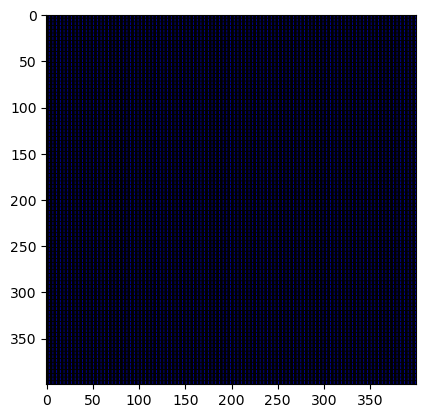

In [20]:
import pylab as plt

# Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 4,4
drgb = 3
# Custom (rgb) rid color
grid_color = [0,0,0]
red = [255,0,0]
green = [0,255,0]
blue = [0,0,150]

# Modify the image to include the grid
crop_image[:,::dy,:] = grid_color
#crop_image[::dx,:,:] = grid_color
crop_image[:,range(1,reso,dy),:] = grid_color
crop_image[:,range(2,reso,dy),:] = grid_color
crop_image[:,range(3,reso,dy),:] = blue

crop_image[::dx,:,:] = grid_color

#crop_image[2:dx,:,:] = green
#crop_image[3:dx,:,:] = blue







# reseize image
#small_80percent = cv2.resize(crop_image, (500, 500))
#bigger_onefive = cv2.resize(crop_image, (1500, 1500))
#bigger_two = cv2.resize(crop_image, (2000, 2000))
#bigger_twofive = cv2.resize(crop_image, (2500, 2500))
# Show the result
plt.imshow(crop_image)
plt.show()


In [21]:
import numpy as np
import cv2
import math
import os

directory = r'D:\Fengjin\TIT\Lab\Dataset\New_Moire_image'
os.chdir(directory)


#read image
img = crop_image

#read reseize image
#img = small_80percent

# change size of image
scale_percent = 150
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)


#2d to 3d (projection)  , and -> rotation point - center point (origin point)
proj2dto3d = np.array([[1,0,-img.shape[1]/2],
                      [0,1,-img.shape[0]/2],
                      [0,0,0],
                      [0,0,1]],np.float32)

# 3d matrixs in  x ,y ,z 

'''
 you can remove any matrix if you dont want to rotate around it , so in our case 
 we rotate around y axis only so any line ends with " #0 " we can remove it 
 and the programe will run 

'''
rx   = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]],np.float32)  #0

ry   = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]],np.float32)

rz   = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]],np.float32)  #0


trans= np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,400],   #400 to move the image in z axis 
                 [0,0,0,1]],np.float32)



proj3dto2d = np.array([ [200,0,img.shape[1]/2,0],
                        [0,200,img.shape[0]/2,0],
                        [0,0,1,0] ],np.float32)

x = -2.5
y = 0.0
z = 2.7 #0

for j in range(0,2):
    for i in range(0,2):

        ax = float(x * (math.pi / 180.0)) #0
        ay = float(y * (math.pi / 180.0)) 
        az = float(z * (math.pi / 180.0)) #0

        rx[1,1] = math.cos(ax) #0
        rx[1,2] = -math.sin(ax) #0
        rx[2,1] = math.sin(ax) #0
        rx[2,2] = math.cos(ax) #0

        ry[0,0] = math.cos(ay)
        ry[0,2] = -math.sin(ay)
        ry[2,0] = math.sin(ay)
        ry[2,2] = math.cos(ay)

        rz[0,0] = math.cos(az) #0
        rz[0,1] = -math.sin(az) #0
        rz[1,0] = math.sin(az) #0
        rz[1,1] = math.cos(az) #0

        r =rx.dot(ry).dot(rz) # if we remove the lines we put    r=ry
        final = proj3dto2d.dot(trans.dot(r.dot(proj2dto3d)))

        dst = cv2.warpPerspective(img, final,(img.shape[1],img.shape[0]),None,cv2.INTER_LINEAR
                                  ,cv2.BORDER_CONSTANT,(255,255,255))
        
        #dst_crop = dst[1500:4500,1500:4500]
        file_name = "{}{}{}{}{}".format('x_',x, 'y_',y,'z_2.7.png')
        cv2.imwrite(file_name,dst)
        y += 0.3
    x += 0.3
    y = 1
    
 


cv2.waitKey(0)

-1

In [4]:
import numpy as np
import cv2
import math
import os

directory = r'D:\Fengjin\TIT\Lab\Dataset\New_Moire_image'
os.chdir(directory)
img = cv2.imread("x_-2.5y_0.0z_0.png")
crop_image = img[1500:4500,1500:4500]
cv2_imwrite(crop_image, half)

NameError: name 'cv2_imwrite' is not defined